In [1]:
from path_setup import add_project_root_to_path

add_project_root_to_path()

Project root added to sys.path


In [2]:
from pipeline.utils.path_manager import PathManager
from pipeline.utils.visualization import analyze_tail_posture_changes, generate_tail_posture_subplots, tail_posture_changes_to_df
from pipeline.utils.data_analysis_utils import sorting_key, load_monitoring_pipeline_results, aggregate_pipeline_montioring_results

path_manager = PathManager()

path_to_config_files = path_manager.path_to_config_files
path_to_piglet_rearing_info = path_manager.path_to_piglet_rearing_info
path_to_pipeline_outputs = path_manager.path_to_monitoring_pipeline_outputs
path_to_result_data_aggregations = path_manager.path_to_pipeline_results_aggregations

### Data Preparation


In [3]:
# load data
pipeline_monitoring_results = load_monitoring_pipeline_results(
    path_to_pipeline_outputs, path_to_config_files)

Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
Dataframe became empty after time filtering: Kamera5_2022_05_11_08_18_23-09_18_23.csv. Skipping.
Dataframe became empty after time filtering: Kamera5_2022_05_13_08_18_21-09_18_21.csv. Skipping.
Loaded 1 non-empty dataframes out of 3 found CSVs for Kamera5/220510_220529.
Missing 1 day(s) for Kamera5/221219_230126: [datetime.date(2023, 1, 26)]
Missing 7 day(s) for Kamera5/220228_220407: [datetime.date(20

In [4]:
# Sort the monitoring_results by pen number and then by start date
pipeline_monitoring_results.sort(key=sorting_key)

In [5]:
# print datespans of every analysis
for i, data in enumerate(pipeline_monitoring_results[:5]):
    print("Datespan Index " + str(i) + ": " + data["date_span"])
    print("Camera Index " + str(i) + ": " + data["camera"])
    print("")


Datespan Index 0: 211228_220119
Camera Index 0: Kamera1

Datespan Index 1: 220228_220328
Camera Index 1: Kamera1

Datespan Index 2: 220505_220530
Camera Index 2: Kamera1

Datespan Index 3: 220726_220831
Camera Index 3: Kamera1

Datespan Index 4: 221003_221106
Camera Index 4: Kamera1



### ECPLF plots


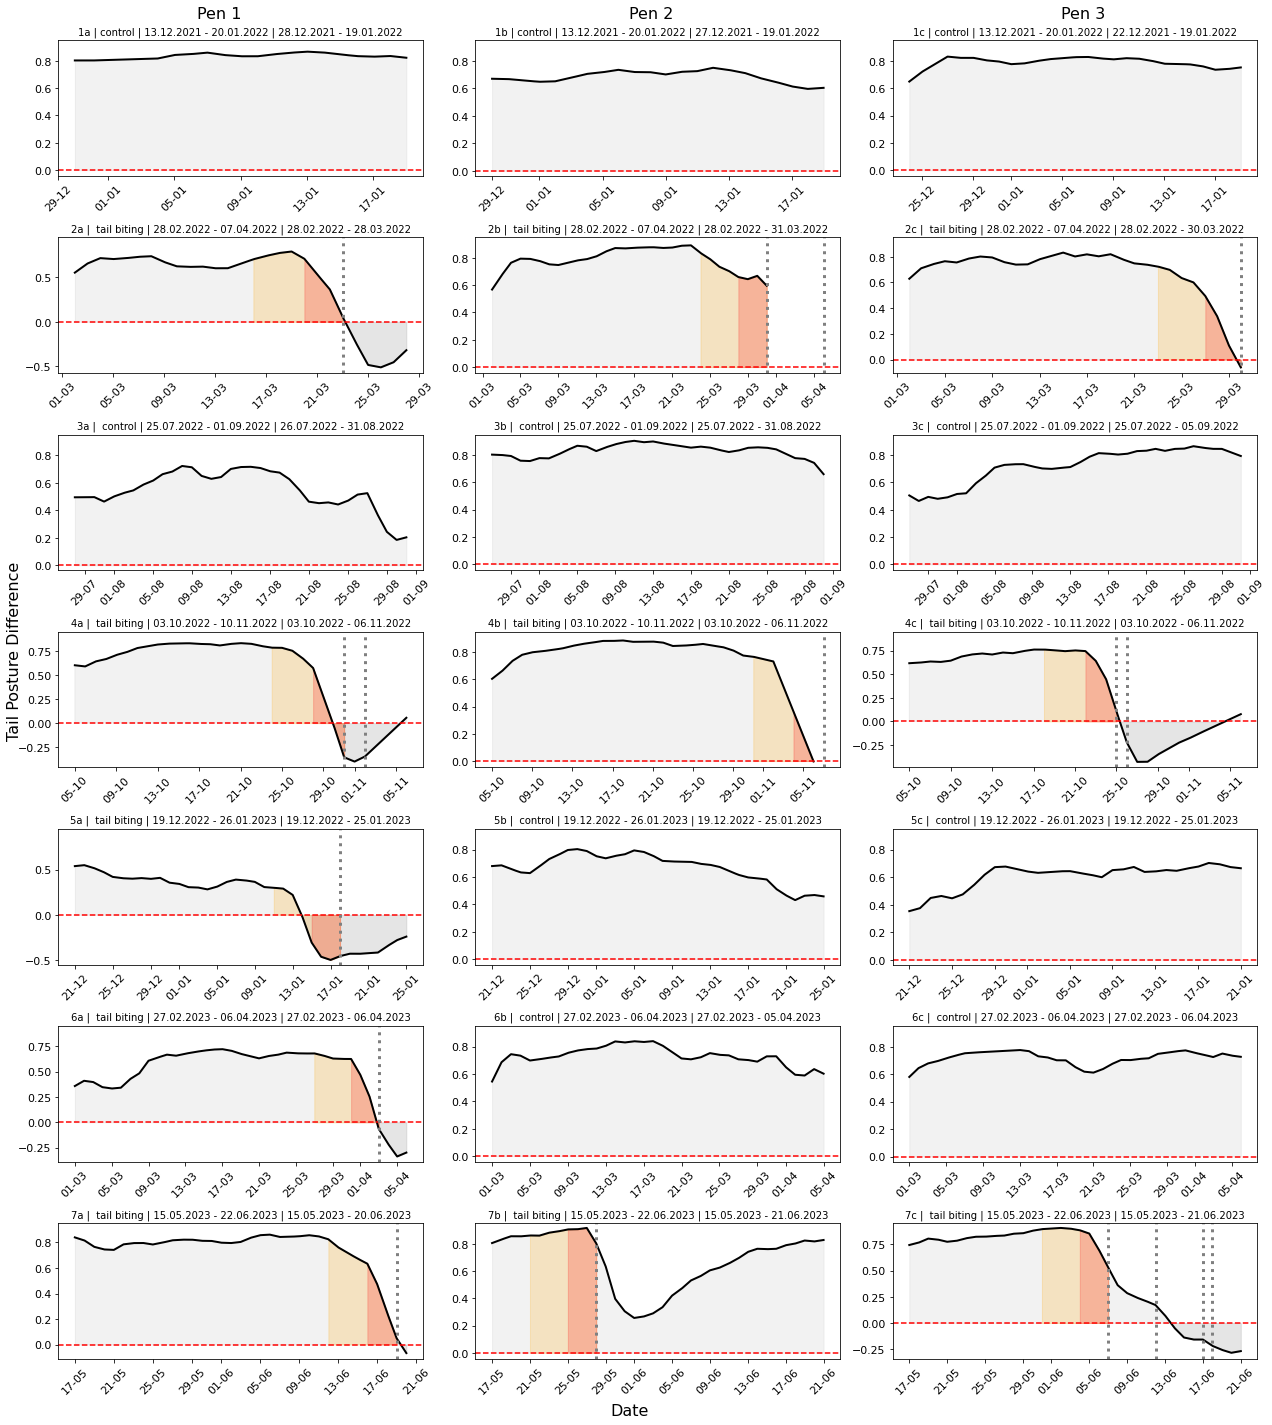

In [6]:
generate_tail_posture_subplots(pipeline_monitoring_results, [
                               "Kamera1", "Kamera2", "Kamera3"], path_to_piglet_rearing_info, resample_freq="D", skip_datespans=["220509_220616"], normalize=True, rolling_window=3)

In [10]:
posture_diff_changes = tail_posture_changes_to_df(pipeline_monitoring_results, path_to_piglet_rearing_info, normalize=True, filter_cameras=["Kamera1", "Kamera2", "Kamera3"])
posture_diff_changes

,camera,date_span,culprit_removal_date,score_at_removal,score_7_days_prior,num_tails_upright_at_removal,num_tails_hanging_at_removal,num_tails_upright_7_days_prior,num_tails_hanging_7_days_prior,days_from_negative_posture_difference_to_culprit_removal
0,Kamera1,220228_220328,2022-03-23,-0.391144,0.718744,0.304428,0.695572,0.859372,0.140628,1.0
1,Kamera1,220726_220831,2022-08-31,0.198974,0.362506,0.599487,0.400513,0.681253,0.318747,NaN
2,Kamera1,221003_221106,2022-10-31,-0.518169,0.785563,0.240916,0.759084,0.892782,0.107218,3.0
3,Kamera1,221219_230125,2023-01-18,-0.430174,0.334501,0.284913,0.715087,0.667250,0.332750,5.0
4,Kamera1,230227_230406,2023-04-03,-0.349031,0.687040,0.325484,0.674516,0.843520,0.156480,1.0
5,Kamera1,230515_230620,2023-06-20,-0.115502,0.660151,0.442249,0.557751,0.830076,0.169924,3.0
6,Kamera2,211227_220119,2022-01-19,0.638160,0.767040,0.819080,0.180920,0.883520,0.116480,NaN
7,Kamera2,220228_220331,2022-03-31,0.424119,0.725955,0.712059,0.287941,0.862978,0.137022,NaN
8,Kamera2,221003_221106,2022-11-07,-0.433872,0.792146,0.283064,0.716936,0.896073,0.103927,3.0
9,Kamera2,221219_230125,2023-01-25,0.416266,0.576874,0.708133,0.291867,0.788437,0.211563,NaN


In [9]:
# tail posture difference
avg_pd_at_removal = posture_diff_changes['score_at_removal'].mean()
avg_pd_7_days_prior = posture_diff_changes['score_7_days_prior'].mean()
pd_percentage_difference = ((avg_pd_7_days_prior - avg_pd_at_removal) / avg_pd_at_removal) * 100
print("AVG tail posture difference at removal: " + str(avg_pd_at_removal))
print("AVG tail posture difference 7 days prior: " + str(avg_pd_7_days_prior))
print("Percentage difference tail posture difference: " + str(pd_percentage_difference))
print("")


#  upright
avg_tu_at_removal = posture_diff_changes['num_tails_upright_at_removal'].mean()
avg_tu_7_days_prior = posture_diff_changes['num_tails_upright_7_days_prior'].mean()
tu_percentage_difference = ((avg_tu_7_days_prior - avg_tu_at_removal) / avg_tu_at_removal) * 100
print("AVG tails upright at removal: " + str(avg_tu_at_removal))
print("AVG tails upright 7 days prior: " + str(avg_tu_7_days_prior))
print("Percentage difference tails upright: " + str(tu_percentage_difference))
print("")

#  hanging
avg_th_at_removal = posture_diff_changes['num_tails_hanging_at_removal'].mean()
avg_th_7_days_prior = posture_diff_changes['num_tails_hanging_7_days_prior'].mean()
th_percentage_difference = ((avg_th_7_days_prior - avg_th_at_removal) / avg_th_at_removal) * 100
print("AVG tails hanging at removal: " + str(avg_th_at_removal))
print("AVG tails hanging 7 days prior: " + str(avg_th_7_days_prior))
print("Percentage difference tails hanging: " + str(th_percentage_difference))
print("")

# days from removal to first negative change
days_to_first_negative_change = posture_diff_changes['days_from_negative_posture_difference_to_culprit_removal'].mean()
max_days_to_first_negative_change = posture_diff_changes['days_from_negative_posture_difference_to_culprit_removal'].max()
min_days_to_first_negative_change = posture_diff_changes['days_from_negative_posture_difference_to_culprit_removal'].min()
print("AVG days to first negative change: " + str(days_to_first_negative_change))
print("MAX days to first negative change: " + str(max_days_to_first_negative_change))
print("MIN days to first negative change: " + str(min_days_to_first_negative_change))


AVG tail posture difference at removal: -0.01438994787331867
AVG tail posture difference 7 days prior: 0.6870147583940956
Percentage difference tail posture difference: -4874.268568880184

AVG tails upright at removal: 0.49280502606334065
AVG tails upright 7 days prior: 0.8435073791970477
Percentage difference tails upright: 71.1645244236269

AVG tails hanging at removal: 0.5071949739366594
AVG tails hanging 7 days prior: 0.1564926208029522
Percentage difference tails hanging: -69.14547090474605

AVG days to first negative change: 2.375
MAX days to first negative change: 5.0
MIN days to first negative change: 1.0


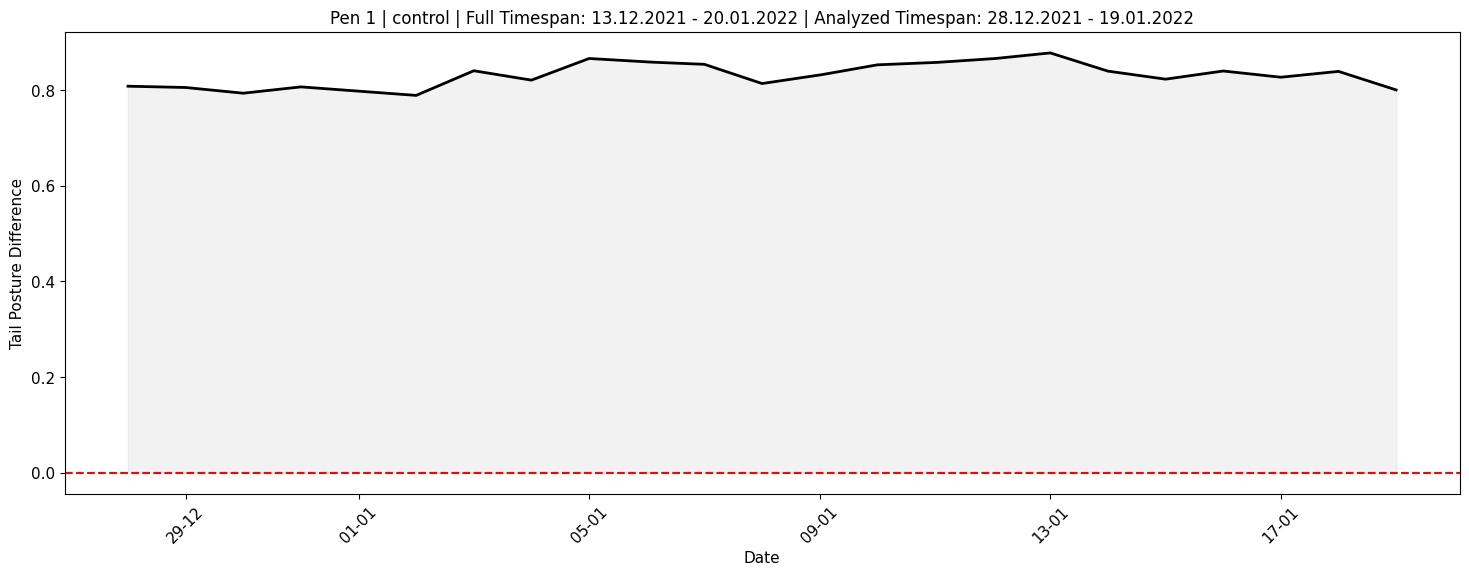

In [7]:
for result in pipeline_monitoring_results:
    analyze_tail_posture_changes(result, path_to_piglet_rearing_info,
                                resample_freq="D", normalize=True, rolling_window=None)
    break


### Save aggregated data


In [ ]:
for result in pipeline_monitoring_results:
    aggregate_pipeline_montioring_results(
        result, path_to_result_data_aggregations=path_to_result_data_aggregations, normalize=True, resample_freq="D", rolling_window=None, save_data=True)

## Additional Pens


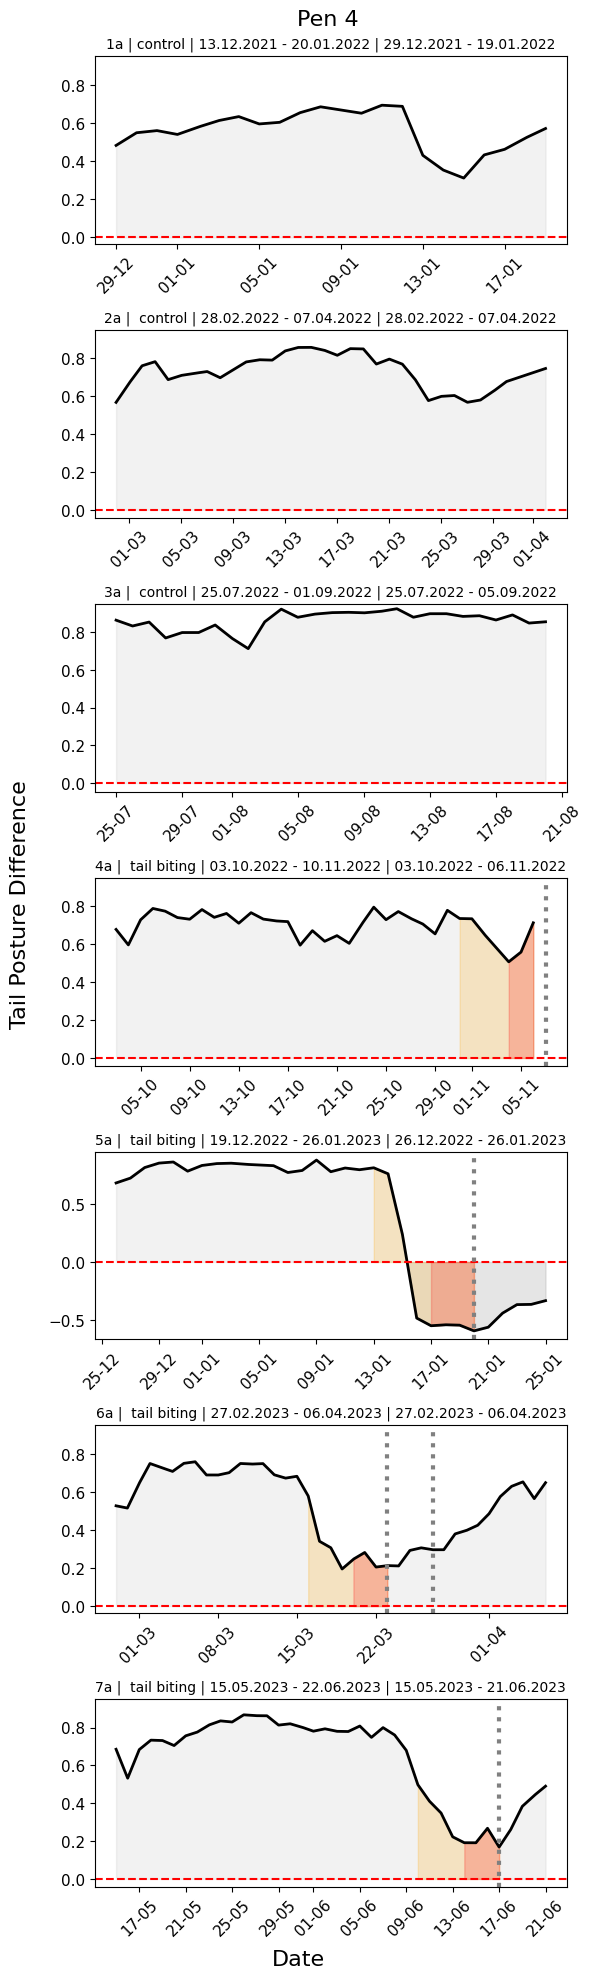

In [7]:
generate_tail_posture_subplots(pipeline_monitoring_results, [
                               "Kamera4"], path_to_piglet_rearing_info, resample_freq="D", skip_datespans=["220509_220616"], normalize=True, rolling_window=None)